In [1]:
import pandas as pd
data = pd.read_csv('house_price.csv')

#Drop columns contains nan
data = data.dropna()

In [2]:
#Clean "Price" Column
#1. Formatting
#2. Estimate the house price if it is rented.
#3. Remove outliers


rent_hitlist_w = data['Price'].str.contains('[Ww]')#Get the hit list of rent by week
rent_hitlist_m = data['Price'].str.contains('[Mm]')#Get the hit list of rent by month

#Clean the symbols and change the data type. 
data['Price']= data['Price'].replace({'[A-Za-z£\$,]':''},regex=True).astype(float) 

#Estimated house price by using PRR
#REF1: https://www.statista.com/statistics/592108/house-price-to-rent-ratio-uk/
#REF2: https://www.investopedia.com/terms/p/price-to-rent-ratio.asp
WEEKS_IN_YEAR = 52.14 #Total numer of weeks in a year
MONTH_IN_YEAR = 12
PRR = 112.7 #Price-to-Rent Ratio 
# Replace the value based on the hit list
data.loc[rent_hitlist_w,'Price']=data.loc[rent_hitlist_w,'Price']*WEEKS_IN_YEAR*PRR
data.loc[rent_hitlist_m,'Price']=data.loc[rent_hitlist_m,'Price']*MONTH_IN_YEAR*PRR

#Remove outliers
hitlist = data['Price'].between(1.0e+4,1.0e+6,inclusive=True) #Only check house price between 10,000 and 1,000,000
data = data[hitlist]

In [3]:
#Clean the "Size(Sq M)" Column
#1. Remove not numeric values
#2. Formatting
#3. Remove outliers

hitlist=data['Size(Sq M)'].str.contains('[A-Za-z]')#find not numeric value and use logic NOT to build the hitlist
data = data[~hitlist] #Remove not numeric values
data['Size(Sq M)'] = data['Size(Sq M)'].astype(float)

#Remove outliers
hitlist = data['Size(Sq M)'].between(30.0,300.0,inclusive=True) #Only check house size between 30 and 300 Sq M
data = data[hitlist]

In [4]:
#Clean the "Postcode" Column

#All Caps
data['Postcode'] = data['Postcode'].str.upper()
#Remove last 3 characters to get the region code
data['Postcode'] = data['Postcode'].replace({'\s+':''},regex=True).str.slice(0,-3)

In [5]:
#Clean the "House Type" Column

#All Caps
data['House type'] = data['House type'].str.upper()

#Mapping to "HOUSE", and "FLAT" only

#Any type with semi detached and detached are labeled as house
data['House type'] = data['House type'].replace(to_replace='(.*)DE(.*)',value='HOUSE',regex=True)
#Any type with Terraced are labeled as house
data['House type'] = data['House type'].replace(to_replace='(.*)TE(.*)',value='HOUSE',regex=True) 
#Bungalows are labeled as flat
data['House type'] = data['House type'].replace(to_replace='BUNGALOW',value='FLAT',regex=True)
#Any type of Apartment are labeled as flat
data['House type'] = data['House type'].replace(to_replace='(.*)AP(.*)',value='FLAT',regex=True)

In [6]:
data

,Number of Bedrooms,House type,Postcode,Size(Sq M),Price
0,5.0,HOUSE,S8,70.0,867000.000
1,3.0,FLAT,S2,50.0,554484.000
5,1.0,FLAT,S1,43.0,608580.000
8,1.0,FLAT,S1,43.0,676200.000
12,5.0,FLAT,S11,140.0,522979.842
14,3.0,HOUSE,DE7,134.0,155000.000
18,4.0,HOUSE,17,30.0,327500.000
19,4.0,HOUSE,S2,140.0,173000.000
21,4.0,HOUSE,S10,158.0,300000.000
23,3.0,HOUSE,S6,165.0,100000.000


In [12]:
from sklearn.model_selection import train_test_split

proper_data = data[['Number of Bedrooms', 'House type', 'Postcode', 'Size(Sq M)']]

X = proper_data
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y)

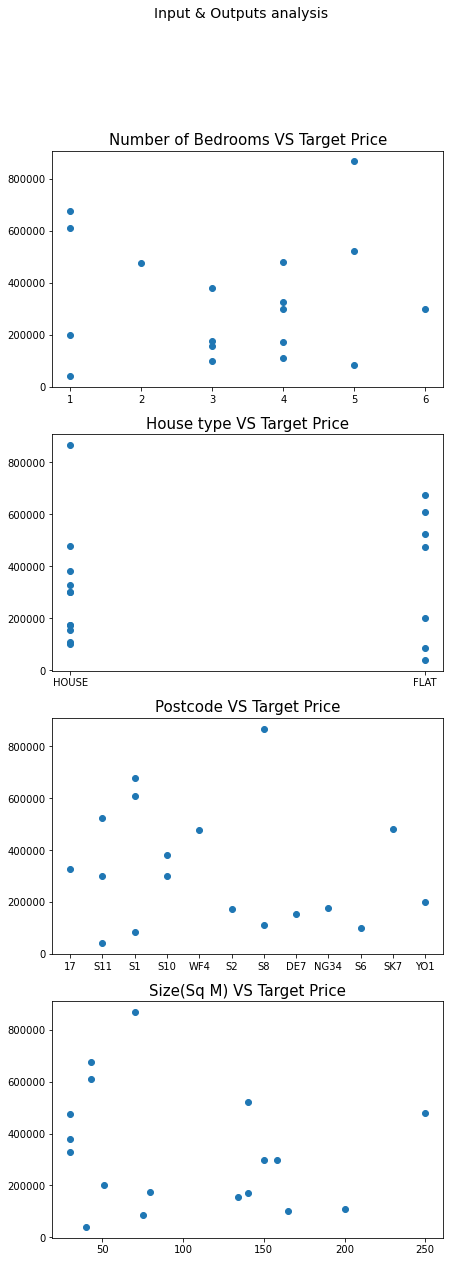

In [26]:
from matplotlib import pyplot as plt

fig, ax_arr = plt.subplots(nrows=4, ncols=1, sharex=False, sharey=False)
fig.set_figwidth(7)
fig.set_figheight(20)
fig.suptitle("Input & Outputs analysis", fontsize=14)

for j in range(4):
        col_name = X_train.columns[j]
        ax_arr[j].scatter(X_train[col_name], y_train)
        ax_arr[j].set_title(col_name+" VS Target Price", fontsize=15)

In [27]:
X_train_SIZE = X_train[['Size(Sq M)']]
X_test_SIZE = X_test[['Size(Sq M)']]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_SIZE, y_train)

LinearRegression()

In [28]:
y_predict = model.predict(X_test_SIZE)
error = y_test - y_predict
error.describe()

count         6.000000
mean     120211.841090
std      199317.780675
min     -203791.761726
25%       57461.447851
50%      127735.850668
75%      220044.617781
max      384740.253202
Name: Price, dtype: float64

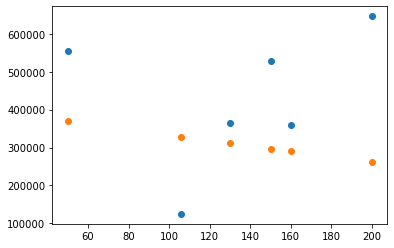

In [30]:
plt.scatter(X_test_SIZE, y_test)
plt.scatter(X_test_SIZE, y_predict)